In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dhaka Rent.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

In [5]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [7]:
df.area.mean()

2289.0

In [8]:
df.rent.mean()

37269.166666666664

In [9]:
x = df[['area']] # x = df.drop('rent', axis=1)

In [10]:
y = df[['rent']]

In [11]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [12]:
y.head() #

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [13]:
reg = LinearRegression()  

In [14]:
reg.fit(x,y) 

LinearRegression()

In [15]:
#reg.coef_ 

In [16]:
#reg.intercept_ 

In [17]:
#reg.predict([[3000]])

In [18]:
#result = ((reg.coef_) * 3000) + (reg.intercept_)
#result

In [19]:
#52408.2489744-52100

In [20]:
#df['predicted_rent'] = reg.predict(x)

In [21]:
#y.head()

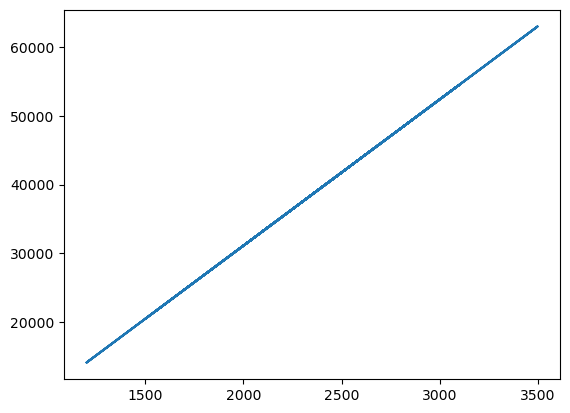

In [22]:
plt.plot(df.area, reg.predict(x))

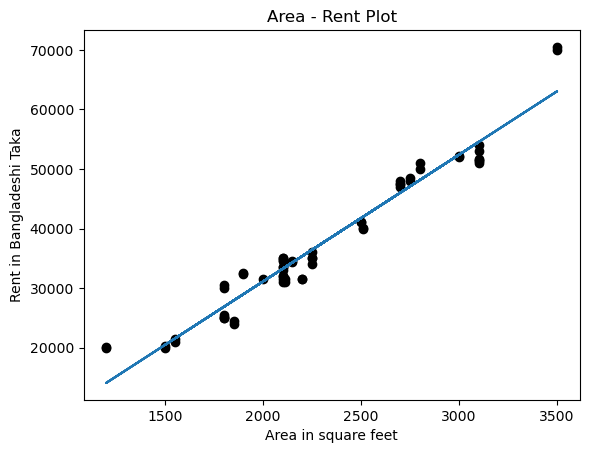

In [23]:
plt.plot(df.area, reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [24]:
reg.score(x,y) # training sccuracy

0.950249380357677

In [25]:
# actual - predicted
mean_squared_error(y, reg.predict(df[['area']]))

6778077.204095561

In [26]:
mean_absolute_error(y, reg.predict(df[['area']]))

2009.8695093576282

#  Train Test Data 

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .30, random_state = 1) #train_size = .70 

In [28]:
xtrain.head()

,area
52,3500
19,2700
42,2100
56,2750
17,1550


In [29]:
ytrain.head()

,rent
52,70500
19,47000
42,34700
56,48500
17,21000


In [30]:
xtrain.shape

(42, 1)

In [31]:
ytrain.shape

(42, 1)

In [32]:
xtest.shape

(18, 1)

In [33]:
ytest.shape

(18, 1)

In [34]:
#for save data 
#xtrain.to_csv('trainx.csv')

In [35]:
reg1 = LinearRegression()

In [36]:
reg1.fit(xtrain,ytrain)

LinearRegression()

In [37]:
reg1.coef_

array([[21.71038918]])

In [38]:
reg1.intercept_

array([-12534.95598546])

In [39]:
reg1.predict([[3000]])

array([[52596.21154101]])

In [40]:
reg1.score(xtrain,ytrain) # training sccuracy

0.9515633925067879

In [41]:
reg1.predict(xtest)

array([[33056.86128307],
       [33056.86128307],
       [41741.01695327],
       [26543.74453042],
       [33273.96517483],
       [36313.4196594 ],
       [36313.4196594 ],
       [28714.78344797],
       [34142.38074185],
       [26543.74453042],
       [48254.13370592],
       [13517.51102513],
       [26543.74453042],
       [36313.4196594 ],
       [47168.61424714],
       [20030.62777778],
       [33056.86128307],
       [34142.38074185]])

In [44]:
pred = reg1.predict(xtest)

In [45]:
pred

array([[33056.86128307],
       [33056.86128307],
       [41741.01695327],
       [26543.74453042],
       [33273.96517483],
       [36313.4196594 ],
       [36313.4196594 ],
       [28714.78344797],
       [34142.38074185],
       [26543.74453042],
       [48254.13370592],
       [13517.51102513],
       [26543.74453042],
       [36313.4196594 ],
       [47168.61424714],
       [20030.62777778],
       [33056.86128307],
       [34142.38074185]])

In [46]:
reg1.score(xtest,ytest)

0.9174928490312289

In [47]:
reg1.score(xtrain,ytrain)

0.9515633925067879

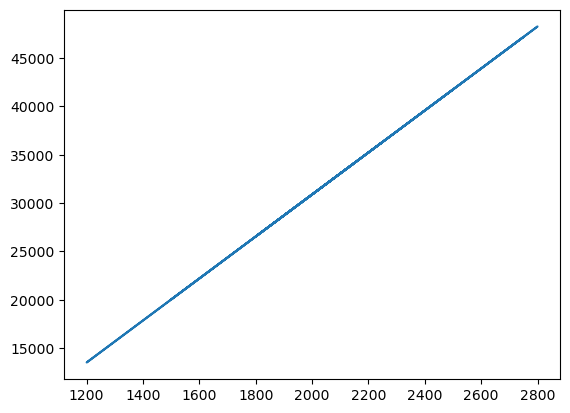

In [48]:
plt.plot(xtest,reg1.predict(xtest))

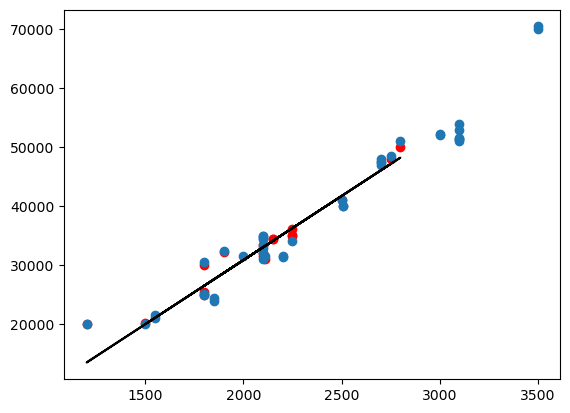

In [51]:
plt.plot(xtest,reg1.predict(xtest),color ='black')
plt.scatter(xtest,ytest, color = 'red')
plt.scatter(xtrain,ytrain)

In [52]:
import pickle as pk 
import joblib

In [57]:
pk.dump(reg1,open('my_lr1','wb'))

In [59]:
reg2= pk.load(open('my_lr1','rb')) #read binary

In [60]:
reg2.predict([[3000]])

array([[52596.21154101]])